In [77]:
city = 'bristol'
inroot  = '../Data/fsqdb/'    + city + '/'
outfolder = '../ProcessedData/' + city + '/'
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline  
LIMIT = 4

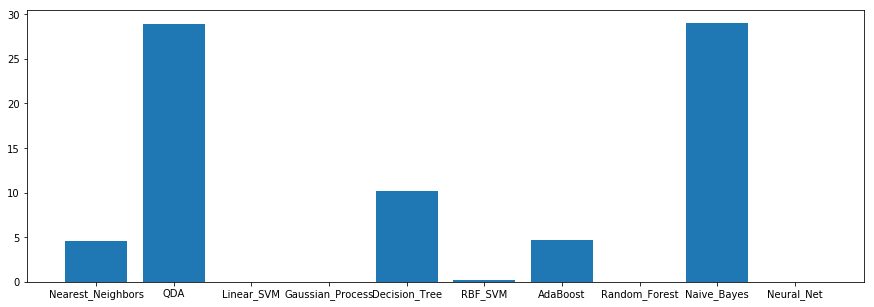

In [102]:
''' GET THE PREDICTED HOME LOCATIONS FOR THE USERS'''

df = pd.read_csv(outfolder + '/user_homes/MLresults/' + city + '_ML_home_classification_RESULTS_' + str(LIMIT) + '.csv', sep = '\t', index_col=0)

data2 = {}
for column in df:
    if 'pred_home' in column:

        ddf = df.groupby( ['user' ]).filter(lambda x: x[column].sum() == 1.)
        ddf = ddf.loc[df[column] == 1]
        ddf = ddf[['user', 'venue']]

        ddf.to_csv(outfolder + '/user_homes/MLhomes/' + city + '_predicted_homes_' + str(LIMIT) + '_' + column + '.csv' , sep = '\t', index = False)

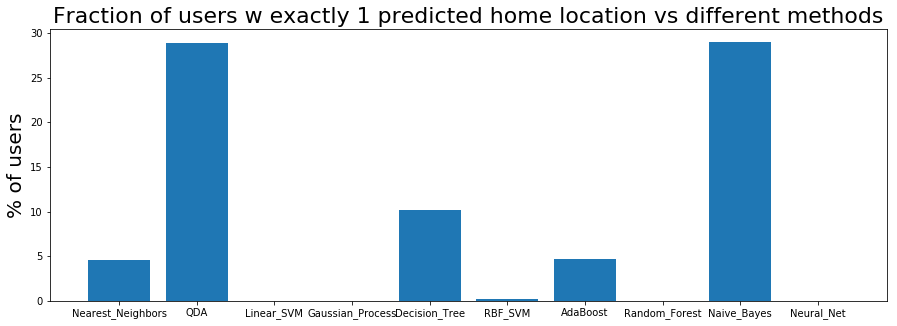

In [109]:
''' FRACTION OF USERS WITH ML PREDICTED HOME LOCATIONS'''

df = pd.read_csv(outfolder + '/user_homes/MLresults/' + city + '_ML_feature_has_home_RES_count_' + str(6) + '.csv' , sep = '\t', index_col=0).fillna(0)

data = {}
for column in df:
    data[column.replace('pred_home', '')] =round(100*df[column][1]/float(df[column].sum()), 2)
   
f, ax  = plt.subplots(1, 1, figsize=(15, 5))
names  = list(data.keys())
values = list(data.values())

ax.bar(range(len(data)),values,tick_label=names, label = 'Has 1 ML home location')
ax.set_ylabel('% of users', fontsize= 20)


f.savefig(outfolder   + '/figures/MLresults/' + city + '_ML_fraction_os_users_with_home_' + str(LIMIT) + '.png')
ax.set_title('Fraction of users w exactly 1 predicted home location vs different methods', fontsize = 22)
plt.show()
